In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from sklearn.cross_validation import train_test_split
from sklearn.utils import resample

In [33]:
data = pd.read_csv("processedlaptopinfo.csv", sep = ",")
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop('Unnamed: 0', axis=1)

data = resample(data, n_samples = 470, random_state=0)

traindata, testdata = train_test_split(data, test_size=0.2, random_state=0)

# traindata = data[:-83]
# testdata = data[340:]

Xtrain = traindata.drop('Price', axis = 1)
ytrain = traindata[['Price']]

Xtest = testdata.drop('Price', axis = 1)
ytest = testdata[['Price']]

# print (data.head())

In [34]:
ctf = RandomForestRegressor(n_estimators = 50)
ctf.fit(Xtrain, ytrain.values.ravel())
ypredict = ctf.predict(Xtest)
flattentest = ytest.values.ravel()
# print(ytest.values.ravel().shape)
# print(ypredict.shape)
mean_absolute_error(flattentest, ypredict)

932234.0425531915

[136000.0, 712140.0, -615800.0, -334400.0, -1266000.0, -500400.0, -544400.0, -604180.0, 8450000.0, 30000.0, -828180.0, 0.0, 367200.0, -66000.0, -1397200.0, 60000.0, -470600.0, -726400.0, -2479400.0, -1124000.0, 1990800.0, -417200.0, -649580.0, -1148000.0, -436600.0, -2262800.0, 129000.0, 461800.0, -17200.0, -802800.0, -32340.0, -266140.0, 1777020.0, -3393000.0, -374000.0, -341200.0, -679200.0, -802580.0, 368600.0, 577000.0, -916780.0, -195180.0, 482800.0, -1148000.0, -675200.0, -675200.0, -411380.0, 124000.0, -172000.0, -1598800.0, 124000.0, -2262800.0, 9000.0, -480000.0, -1520200.0, -322200.0, 659600.0, -998000.0, 1436740.0, 461800.0, 1645800.0, 577000.0, 102000.0, 3488000.0, -470600.0, -998000.0, 24000.0, 194040.0, -506000.0, 1018800.0, -77760.0, 618000.0, 461800.0, -376400.0, 60000.0, 130000.0, -726400.0, 541800.0, -288000.0, 2381200.0, 627800.0, -450400.0, -1056200.0, -362200.0, -1594000.0, -3437000.0, 8025800.0, 199820.0, 1583600.0, 2092000.0, -386000.0, -266140.0, -436600.0, -114

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


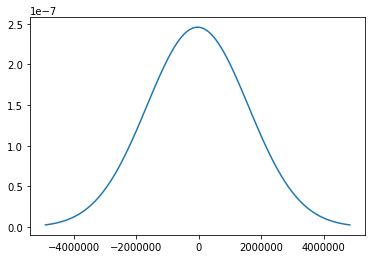

-35873.1914893617
2635002190378.952
1623268.982756386


In [36]:
err = []
for idx in range(len(flattentest)):
    err.append(flattentest[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)
print (sigma)